## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')


In [6]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
combined_data.value_counts().head(50)

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          30         39.005554           1                   1
i177      Ramicane      Male    10          18          20         35.345361           0                   1
                                                        25         34.082180           1                   1
                                                        30         34.711473           1                   1
                                                        35         35.152166           1                   1
                                                        40         35.557933           2                   1
                        

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data_clean = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
combined_data_clean.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i334      Ramicane      Female  8           20          45         36.374510           2                   1
i177      Ramicane      Male    10          18          35         35.152166           1                   1
                                                        40         35.557933           2                   1
                                                        45         33.562402           3                   1
                                                                                                          ..
q610      Ramicane      Female  18          21          30         40.668343           1                   1
                                                        35         36.561652           2                   1
q633      Zoniferol     

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_g898 = combined_data.loc[(combined_data['Mouse ID']== 'g989')]#& (combined_data['Timepoint']==0)]
duplicate_data_g898

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
combined_data_clean['Mouse ID'].nunique()

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Summary Table and Mean
tumor_vol = combined_data_clean.copy()[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
tumor_vol_summary = tumor_vol.groupby('Drug Regimen').mean().reset_index()
tumor_vol_summary = tumor_vol_summary.rename(columns={'Tumor Volume (mm3)': 'Mean'})
#Median, then Merge to Summary Table
tumor_vol_median = tumor_vol.groupby('Drug Regimen').median().reset_index()
tumor_vol_median = tumor_vol_median.rename(columns={'Tumor Volume (mm3)': 'Median'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_median, on='Drug Regimen', how='left')
#Variance, then Merge to Summary Table
tumor_vol_var = tumor_vol.groupby('Drug Regimen').var().reset_index()
tumor_vol_var = tumor_vol_var.rename(columns={'Tumor Volume (mm3)': 'Variance'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_var, on='Drug Regimen', how='left')
#Standard deviation, then Merge to Summary Table
tumor_vol_std = tumor_vol.groupby('Drug Regimen').std().reset_index()
tumor_vol_std = tumor_vol_std.rename(columns={'Tumor Volume (mm3)': 'Standard Deviation'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_std, on='Drug Regimen', how='left')
#SEM, then Merge to Summary Table
tumor_vol_sem = tumor_vol.groupby('Drug Regimen').sem().reset_index()
tumor_vol_sem = tumor_vol_sem.rename(columns={'Tumor Volume (mm3)': 'SEM'})
tumor_vol_summary = pd.merge(tumor_vol_summary, tumor_vol_sem, on='Drug Regimen', how='left')

#Formatting
tumor_vol_summary['Mean'] = tumor_vol_summary['Mean'].map("{:.3f}".format)
tumor_vol_summary['Median'] = tumor_vol_summary['Median'].map("{:.3f}".format)
tumor_vol_summary['Variance'] = tumor_vol_summary['Variance'].map("{:.3f}".format)
tumor_vol_summary['Standard Deviation'] = tumor_vol_summary['Standard Deviation'].map("{:.3f}".format)
tumor_vol_summary['SEM'] = tumor_vol_summary['SEM'].map("{:.3f}".format)


#Show Summary Table
tumor_vol_summary

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.393,50.910,43.139,6.568,0.526
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_summary_2 = tumor_vol.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_summary_2 = tumor_vol_summary_2.agg(['mean', 'median', 'var', 'std', 'sem'], axis='columns').reset_index()
tumor_vol_summary_2.columns = tumor_vol_summary_2.columns.droplevel()
#formatting and rename
tumor_vol_summary_2['mean'] = tumor_vol_summary_2['mean'].map("{:.3f}".format)
tumor_vol_summary_2['median'] = tumor_vol_summary_2['median'].map("{:.3f}".format)
tumor_vol_summary_2['var'] = tumor_vol_summary_2['var'].map("{:.3f}".format)
tumor_vol_summary_2['std'] = tumor_vol_summary_2['std'].map("{:.3f}".format)
tumor_vol_summary_2['sem'] = tumor_vol_summary_2['sem'].map("{:.3f}".format)

tumor_vol_summary_2 = tumor_vol_summary_2.rename(columns={'':'Drug Regimen', 'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem': 'SEM'})



tumor_vol_summary_2

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.393,50.910,43.139,6.568,0.526
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


## Bar and Pie Charts

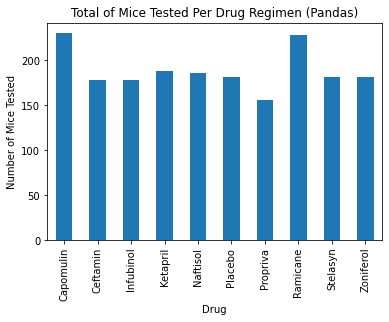

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#get data for bar chart
bar_chart_pd = combined_data_clean.copy()[['Mouse ID', 'Drug Regimen']]
bar_chart_pd = bar_chart_pd.groupby('Drug Regimen').count().reset_index()
#plot chart with pandas and plt
bar_chart_pd.plot(kind='bar', legend=None, align='center')

#formatting, titles, x&y labels, etc. 
drugs = bar_chart_pd['Drug Regimen']
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, drugs)

plt.xlabel("Drug")
plt.ylabel("Number of Mice Tested")

plt.title('Total of Mice Tested Per Drug Regimen (Pandas)')
plt.show()

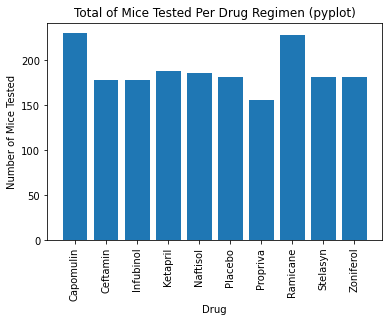

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#get data for bar chart in pyplot
bar_chart_plt = combined_data_clean.copy()[['Mouse ID', 'Drug Regimen']]
bar_chart_plt = bar_chart_plt.groupby('Drug Regimen').count().reset_index()
#create x & y axis
drugs = bar_chart_plt['Drug Regimen']
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
y_axis = bar_chart_plt['Mouse ID']

#plot with pyplot, formatting, titles, etc. 
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, drugs,rotation=90)
plt.xlabel("Drug")
plt.ylabel("Number of Mice Tested")
plt.title('Total of Mice Tested Per Drug Regimen (pyplot)')
plt.show()

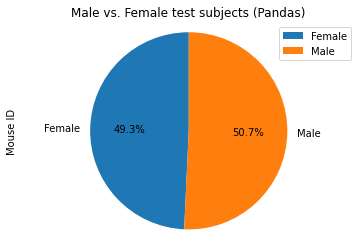

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#get data and count by sex
pie_pd = combined_data_clean.copy()[['Mouse ID', 'Sex']]
pie_pd = pie_pd.groupby('Sex').count()

#plot with pandas as a pie + formatting etc. 
pie_pd.plot(kind='pie', subplots=True, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title('Male vs. Female test subjects (Pandas)')
plt.show()

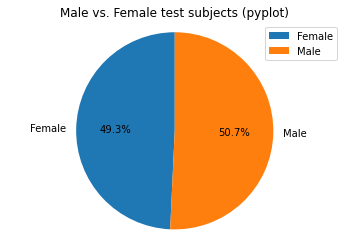

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#get data and count by sex
pie_plt = combined_data_clean.copy()[['Mouse ID', 'Sex']]
pie_plt = pie_plt.groupby('Sex').count().reset_index()


#plot with pandas as a pie + formatting etc. 
labels = pie_plt['Sex']
count = pie_plt['Mouse ID']
plt.pie(count, labels=labels,autopct="%1.1f%%", startangle=90)
plt.title('Male vs. Female test subjects (pyplot)')
plt.legend(loc='best')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_timepoint = combined_data_clean.copy()

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = max_timepoint.loc[(max_timepoint['Drug Regimen'] == 'Capomulin') | (max_timepoint['Drug Regimen'] == 'Ramicane') | (max_timepoint['Drug Regimen'] == 'Infubinol') | (max_timepoint['Drug Regimen'] == 'Ceftamin')]
max_timepoint = max_timepoint[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
max_timepoint = max_timepoint.groupby('Mouse ID').max('Timepoint').reset_index()
max_timepoint = max_timepoint.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})
max_timepoint = max_timepoint[['Mouse ID', 'Final Tumor Volume (mm3)']]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_with_max = combined_data_clean.copy()
data_with_max = data_with_max.loc[(data_with_max['Drug Regimen'] == 'Capomulin') | (data_with_max['Drug Regimen'] == 'Ramicane') | (data_with_max['Drug Regimen'] == 'Infubinol') | (data_with_max['Drug Regimen'] == 'Ceftamin')]
data_with_max = pd.merge(data_with_max, max_timepoint, on='Mouse ID', how='outer')
data_with_max

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.000000
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.000000
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.000000
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.000000
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [19]:
last_tumor_grouped = data_with_max.groupby(['Drug Regimen', 'Mouse ID']).max().reset_index()
last_tumor_grouped = last_tumor_grouped[['Drug Regimen', 'Mouse ID', 'Final Tumor Volume (mm3)']]
last_tumor_grouped

,Drug Regimen,Mouse ID,Final Tumor Volume (mm3)
0,Capomulin,b128,45.651331
1,Capomulin,b742,45.000000
2,Capomulin,f966,45.000000
3,Capomulin,g288,46.304003
4,Capomulin,g316,46.809225
...,...,...,...
95,Ramicane,s508,45.000000
96,Ramicane,u196,47.622816
97,Ramicane,w678,45.000000
98,Ramicane,y449,46.378092


In [20]:
last_tumor_quantiles = last_tumor_grouped.groupby('Drug Regimen').quantile([.25,.5,.75]).round(2).unstack(level=0).transpose().reset_index()
last_tumor_quantiles = last_tumor_quantiles[['Drug Regimen', 0.25, 0.75]]
last_tumor_quantiles = last_tumor_quantiles.rename(columns={0.25: 'Lower Quartile', 0.75:'Upper Quartile'})
last_tumor_quantiles

,Drug Regimen,Lower Quartile,Upper Quartile
0,Capomulin,45.00,46.75
1,Ceftamin,48.72,64.30
2,Infubinol,54.05,65.53
3,Ramicane,45.00,46.34


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", 'Ceftamin', 'Infubinol', 'Ramicane']

#empty Dataframe for summary stats of 4 treatments of interest
summ_stats_4 = pd.DataFrame()

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
   
summ_stats_4['Drug Regimen'] = [treatment for treatment in treatments]

summ_stats_4 = pd.merge(summ_stats_4, last_tumor_quantiles, on='Drug Regimen', how='left')
summ_stats_4['IQR'] = summ_stats_4['Upper Quartile']- summ_stats_4['Lower Quartile']
summ_stats_4['Lower Bound'] = summ_stats_4['Lower Quartile'] - (1.5*summ_stats_4['IQR'])
summ_stats_4['Upper Bound'] = summ_stats_4['Upper Quartile'] - (1.5*summ_stats_4['IQR'])



summ_stats_4


,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
0,Capomulin,45.00,46.75,1.75,42.375,44.125
1,Ceftamin,48.72,64.30,15.58,25.350,40.930
2,Infubinol,54.05,65.53,11.48,36.830,48.310
3,Ramicane,45.00,46.34,1.34,42.990,44.330


In [22]:

 # Determine outliers using upper and lower bounds
 

<AxesSubplot:title={'center':'Final Tumor Volume (mm3)'}, xlabel='[Drug Regimen]'>

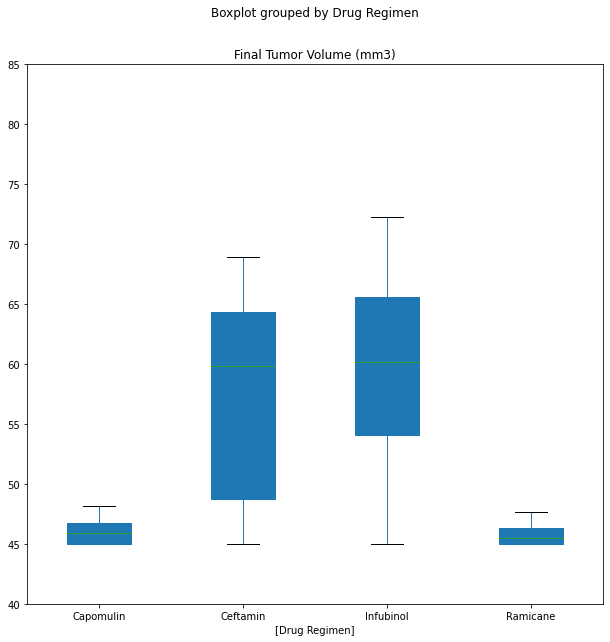

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_table = last_tumor_grouped.copy()
box_plot_table = box_plot_table.boxplot(by='Drug Regimen',grid=False,figsize=(10,10),patch_artist=True)
plt.ylim((40,85))
box_plot_table

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plt = combined_data_clean.copy()
line_plt = line_plt.loc[(line_plt['Drug Regimen']=='Capomulin')&(line_plt['Mouse ID']=='s185')]

line_plt.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


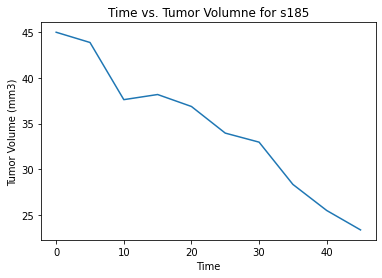

In [25]:
plt.plot(line_plt['Timepoint'], line_plt['Tumor Volume (mm3)'])
plt.title('Time vs. Tumor Volumne for s185')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

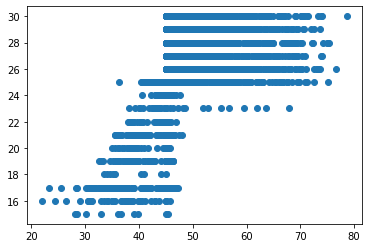

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plt = combined_data_clean.copy()
plt.scatter(scatter_plt['Tumor Volume (mm3)'], scatter_plt['Weight (g)'])
plt.show()

## Correlation and Regression

The r-squared is: 0.34532129339189455


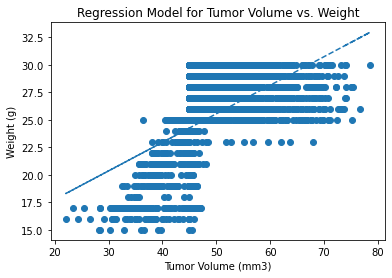

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_plt['Tumor Volume (mm3)'], scatter_plt['Weight (g)'])
regress_values = scatter_plt['Tumor Volume (mm3)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(scatter_plt['Tumor Volume (mm3)'], scatter_plt['Weight (g)'])
plt.plot(scatter_plt['Tumor Volume (mm3)'], regress_values, "--")
plt.title("Regression Model for Tumor Volume vs. Weight")

plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()